In [9]:
!git clone https://github.com/Mackenzie-Beck/CS3220.git

fatal: destination path 'CS3220' already exists and is not an empty directory.


In [16]:
import os
import sys

In [10]:
import random

r1a, r1b, r1c, r2a, r2b, r2c = 'Room1_A', 'Room1_B', 'Room1_C', 'Room2_A', 'Room2_B', 'Room2_C'

p3world = {
    r1a: {r1b: 1, r2a: 1},
    r1b: {r1a: 1, r1c: 1},
    r1c: {r1b: 1, r2c: 1},
    r2a: {r1a: 1, r2b: 1},
    r2b: {r2a: 1, r2c: 1},
    r2c: {r1c: 1, r2b: 1}
}

def create_room_dict():
    """
    Create a dictionary where the key is a room object and the value is a coordinate.

    Returns:
    dict: A dictionary containing the room as the key and the coordinate as the value.
    """
    coordinates = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
    rooms = [r1a, r1b, r1c, r2a, r2b, r2c]
    return {room: coord for room, coord in zip(rooms, coordinates)}




def get_random_rooms(num_rooms=4):
    """
    Returns a list of rooms randomly selected from the available rooms.

    Args:
    num_rooms (int): The number of rooms to select.

    Returns:
    list: A list of randomly selected rooms.
    """
    rooms = [r1a, r1b, r1c, r2a, r2b, r2c]
    return random.sample(rooms, num_rooms)


In [12]:
class SimpleProblemSolvingAgentProgram:
  #Abstract framework for a problem-solving agent
  def __init__(self, initial_state=None):
        """State is an abstract representation of the state
        of the world, and seq is the list of actions required
        to get to a particular state from the initial state(root)."""
        self.state = initial_state
        self.seq = []#solution.

  def __call__(self, percept):
        """Formulate a goal and problem, then
        search for a sequence of actions to solve it."""
        #4-phase problem-solving process
        #print(0)
        self.state = self.update_state(self.state, percept)
        #print(self.state)
        if not self.seq:
            goal = self.formulate_goal(self.state)
            problem = self.formulate_problem(self.state, goal)
            #print(problem.initial)
            self.seq = self.search(problem)
            if not self.seq:
                return None
        return self.seq.pop(0)

  def update_state(self, state, percept):
        raise NotImplementedError

  def formulate_goal(self, state):
        raise NotImplementedError

  def formulate_problem(self, state, goal):
        raise NotImplementedError

  def search(self, problem):
        raise NotImplementedError

In [17]:
import collections

class deliveryProblemSolvingAgent(SimpleProblemSolvingAgentProgram):
  def __init__(self, initial_state=None, dataGraph=None, goal=None, program=None):
    super().__init__(initial_state)
    self.dataGraph=dataGraph
    self.goal=goal

    if program is None or not isinstance(program, collections.abc.Callable):
      print("Can't find a valid program for {}, falling back to default.".format(self.__class__.__name__))

      def program(percept):
        return eval(input('Percept={}; action? '.format(percept)))

    self.program = program


  def update_state(self, state, percept):
    return percept

  def formulate_goal(self, state):
    if self.goal is not None:
      return self.goal
    else:
      print("No goal! can't work!")
      return None

  #a description of the states and actions necessary to reach the goal
  def formulate_problem(self, state, goal):
    #instance of Vacuum ProblemClass
    problem = GraphProblem(state,goal,self.dataGraph)
    return problem

  def search(self, problem):
    seq = self.program(problem)
    print("--------------------------------")
    print(seq)
    print("--------------------------------")
    solution=self.actions_path(seq.path())
    print("Solution (a sequence of actions) from the initial state to a goal: {}".format(solution))
    return solution

  def actions_path(self, p):
    acts=[]
    for n in p:
      acts.append(n.action)
    return acts[1:]


In [18]:
class deliveryProblemSolvingAgentPro(deliveryProblemSolvingAgent):



  def search(self, problem):
     seq, steps, allNodeColors = self.program(problem)
     solution=self.actions_path(seq.path())
     return (solution, steps, allNodeColors)

  def run(self):
    print("goal list:", self.goal)
    if isinstance(self.goal, list) and len(self.goal)>1:
      percept=self.state
      while len(self.goal)>0:
        current_goal=self.goal[0]
        print("current percept:", percept)
        print("current goal:", current_goal)
        """Formulate a goal and problem, then search for a sequence of actions to solve it."""
        #4-phase problem-solving process
        self.state = self.update_state(self.state, percept)
        goal = current_goal
        problem = self.formulate_problem(self.state, goal)
        solution, steps, allNodeColors = self.search(problem)
        self.seq.append(solution)

       # self.seq.append(self.search(problem))
        percept=current_goal
        self.goal.remove(goal)
        print("goal list:", self.goal)

        drawGraph(self.dataGraph, allNodeColors[steps-1], steps)
      if not self.seq:
                return None
      return self.seq
    else:
      return super().__call__(self.state)






In [21]:
class Problem:
    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost.
    The state space should be included in a subclass
    Then you will create instances of your subclass and solve them with the various search functions."""

    def __init__(self, initial, goal=None):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments.
        The variable initial specifies the initial state of the search problem.
        It represents the beginning state.
        From here, our agent begins its task of exploration to find the goal state(s) which is given in the goal parameter.
        """
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Return the actions that can be executed in the given
        state.
        This Problem class only deals with deterministic outcomes.
        So we know for sure what every action in a state would result to
        The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        if isinstance(self.goal, list):
            return self.goal.count(state)>0
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2. If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        return c + 1


In [22]:
class Graph:
    '''A graph connects nodes (vertices) by edges (links). Each edge can also
    have a length associated with it. The constructor call is something like:
        g = Graph({'A': {'B': 1, 'C': 2})
    this makes a graph with 3 nodes, A, B, and C, with an edge of length 1 from
    A to B,  and an edge of length 2 from A to C.

    This makes an undirected graph, so inverse links are also added.
    If you add more links with g.connect('B', 'C', 3), then inverse link is also added.
    You can use g.nodes() to get a list of nodes,
    g.get('A') to get a dict of links out of A,
    and g.get('A', 'B') to get the length of the link from A to B.
    '''
    def __init__(self, graph_dict=None):
      self.graph_dict = graph_dict or {}
      self.make_graph()

    def make_graph(self):
        """Make a digraph into an undirected graph by adding symmetric edges."""
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.connect(b, a, dist)

    def connect(self, A, B, distance):
        """Add a link from A to B of given distance, in one direction only."""
        self.graph_dict.setdefault(A, {})[B] = distance

    def get(self, a, b=None):
        """Return a link distance or a dict of {node: distance} entries.
        .get(a,b) returns the distance or None;
        .get(a) returns a dict of {node: distance} entries, possibly {}."""
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)

    def nodes(self):
        """Return a list of nodes in the graph."""
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)




In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def simple_visualization(data=None):
    #create the graph using p3world dict
    G = nx.Graph(p3world)
    room_dict = create_room_dict()

    # set the size of the plot
    plt.figure(figsize=(10, 8))

    # draw the graph
    nx.draw(G, pos={room: coord for room, coord in room_dict.items()},
            node_color='pink', linewidths=0.3, edgecolors='k', node_size=3000)

    # displaying the title
    plt.title('Room Layout')

    # draw labels for nodes
    nx.draw_networkx_labels(G, pos={room: coord for room, coord in room_dict.items()}, font_size=10)

    plt.show()


In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import lines

def drawGraph(gData, nodeColors,steps):
  G = nx.Graph(gData.graph_dict)
  #print(gData.g.keys())
  #print(nodeColors)
  #print(nodeColors.values())


  #node_color=[nodeColors[node] for node in gData.g.keys()]

  node_label_pos = {k:[v[0],v[1]-0.5]  for k,v in gData.locations.items()}
  edge_weights = {(k, v2) : k2 for k, v in gData.graph_dict.items() for k2, v2 in v.items()}#actions

  # set the size of the plot

  plt.figure(figsize=(18, 13))
  #for node in gData.graph_dict.keys():
   # if node in nodeColors.keys():
    #  print(nodeColors[node])


  # draw the graph (both nodes and edges) with locations
 # print([nodeColors[node] for node in gData.graph_dict])
  nx.draw(G, pos={k: gData.locations[k] for k in G.nodes()},
            node_color=[nodeColors[node] for node in gData.graph_dict],
            linewidths=0.3, edgecolors='k', node_size=100)

  # draw labels for nodes
  node_label_handles = nx.draw_networkx_labels(G, pos={k: [v[0], v[1] + 0.1] for k, v in gData.locations.items()}, font_size=8)
  # add edge lables to the graph
 # nx.draw_networkx_edge_labels(G, pos=gData.locations, edge_labels=edge_weights, font_size=8, font_color='r')


  # displaying the title
  plt.title('Search graph')
  # add a legend
  white_circle = lines.Line2D([], [], color="white", marker='o', markersize=10, markerfacecolor="white")
  orange_circle = lines.Line2D([], [], color="orange", marker='o', markersize=10, markerfacecolor="orange")
  red_circle = lines.Line2D([], [], color="red", marker='o', markersize=10, markerfacecolor="red")
  blue_circle = lines.Line2D([], [], color="blue", marker='o', markersize=10, markerfacecolor="blue")
  green_circle = lines.Line2D([], [], color="green", marker='o', markersize=10, markerfacecolor="green")
  plt.legend((white_circle, orange_circle, red_circle, blue_circle, green_circle),
               ('Un-explored', 'Frontier', 'Currently Exploring', 'Explored', 'Final Solution'),
               numpoints=1, prop={'size': 8}, loc=(0.5, .75))
  plt.show()


In [35]:
import queue as Q
from queue import PriorityQueue
def BestFirstSearchAgentProgramForShow(f=None):
  #with BFS we choose a node, n, with minimum value of some evaluation function, f (n).

    def program(problem):
      #print(111)
      steps = 0
      allNodeColors = []
      nodeColors = {k : 'white' for k in problem.graph.nodes()}

      node = Node(problem.initial)
      nodeColors[node.state] = "yellow"
      steps += 1
      allNodeColors.append(dict(nodeColors))

      #print(node.state)
      frontier = PriorityQueue()
      frontier.put((1,node))

      nodeColors[node.state] = "orange"
      steps += 1
      allNodeColors.append(dict(nodeColors))



      reached = {problem.initial:node}

      while frontier:
        node = frontier.get()[1]
        nodeColors[node.state] = "red"
        steps += 1
        allNodeColors.append(dict(nodeColors))
        print('Frontier:',node)

        if problem.goal_test(node.state):
          nodeColors[node.state] = "green"
          steps += 1
          allNodeColors.append(dict(nodeColors))
          return (node,steps,allNodeColors)


        #reached.add(node.state)
        for child in node.expand(problem):
            if child.state not in reached or child.path_cost<reached[child.state].path_cost:
                frontier.put((1,child))
                nodeColors[child.state] = "orange"
                steps += 1
                allNodeColors.append(dict(nodeColors))

                reached.update({child.state:child})

        # modify the color of explored nodes to blue
        nodeColors[node.state] = "blue"
        steps += 1
        allNodeColors.append(dict(nodeColors))

      return None

    return program

In [28]:
class myMap(Graph):
  def __init__(self, graph_dict=None, locations=None):
    super().__init__(graph_dict)
    self.locations=locations

  def getLocation(self,a):
    return self.locations.get(a)



In [30]:
class GraphProblem(Problem):

    """The problem of searching a graph from one node to another."""
    '''
    The state space is stored as nested dictionaries
    G={'node1':{'neighbor1_of_Node1':distance_from_Node1_to_neighbor1_of_Node1,..},
       .....}

    '''

    def __init__(self, initial, goal, graph):
        super().__init__(initial, goal)
        self.graph = graph#The state space

    def actions(self, A):
        """The actions at a graph node are just its neighbors."""
        return list(self.graph.get(A).keys())

    def result(self, state, action):
      #A transition model
        """The result of going to a neighbor is just that neighbor."""
        return action

    def path_cost(self, cost_so_far, A, action, B):
      #An action cost function
        return cost_so_far + self.graph.get(A, B)

In [32]:
class Node:
    """A node in a search tree.
    Contains a pointer to the parent (the node that this is a successor of)
    and to the actual state for this node.
    !!! Note that if a state is arrived at by two paths, then there are two nodes with
    the same state.
    Also includes the action that got us to this state,
    and  the total path_cost (also known as g) to reach the node.
    You will not need to     subclass this class."""

    def __init__(self, state, parent=None, action=None, path_cost=0):
        """Create a search tree Node, derived from a parent by an action."""
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __repr__(self):
        return "<Node {}>".format(self.state)

    def __lt__(self, node):
        return self.state < node.state
    '''
    We can expand the node, by considering
    the available ACTIONS for that state
    '''
    def expand(self, problem):
        """List the nodes reachable in one step from this node."""
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        #using the RESULT function to see where those actions lead to
        next_state = problem.result(self.state, action)
        # and generating a new node (called a child node)
        #for each of the resulting states
        next_node = Node(next_state, self, action, problem.path_cost(self.path_cost, self.state, action, next_state))
        return next_node

    def solution(self):
        """Return the sequence of actions to go from the root to this node."""
        return [node.action for node in self.path()[1:]]

    def path(self):
        """Return a list of nodes forming the path from the root to this node."""
        '''
        Following the PARENT pointers back from a node allows us to
        recover the states and actions along the path to that node.
        Doing this from a goal node gives us the solution
        '''
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))

    # We want for a queue of nodes in breadth_first_graph_search or
    # astar_search to have no duplicated states, so we treat nodes
    # with the same state as equal. [Problem: this may not be what you
    # want in other contexts.]

    def __eq__(self, other):
        return isinstance(other, Node) and self.state == other.state


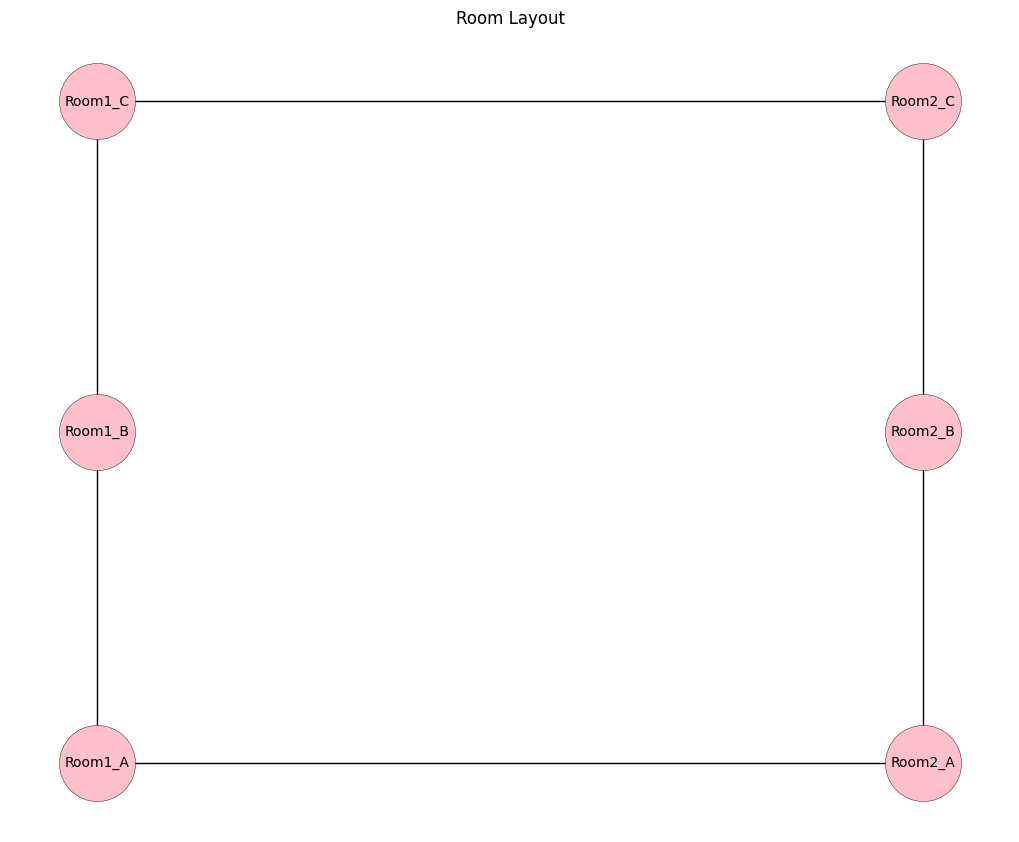

goal list: ['Room2_B', 'Room1_B', 'Room1_C', 'Room2_C', 'Room1_A']
current percept: Room1_A
current goal: Room2_B
Frontier: <Node Room1_A>
Frontier: <Node Room1_B>
Frontier: <Node Room1_C>
Frontier: <Node Room2_A>
Frontier: <Node Room2_B>
goal list: ['Room1_B', 'Room1_C', 'Room2_C', 'Room1_A']


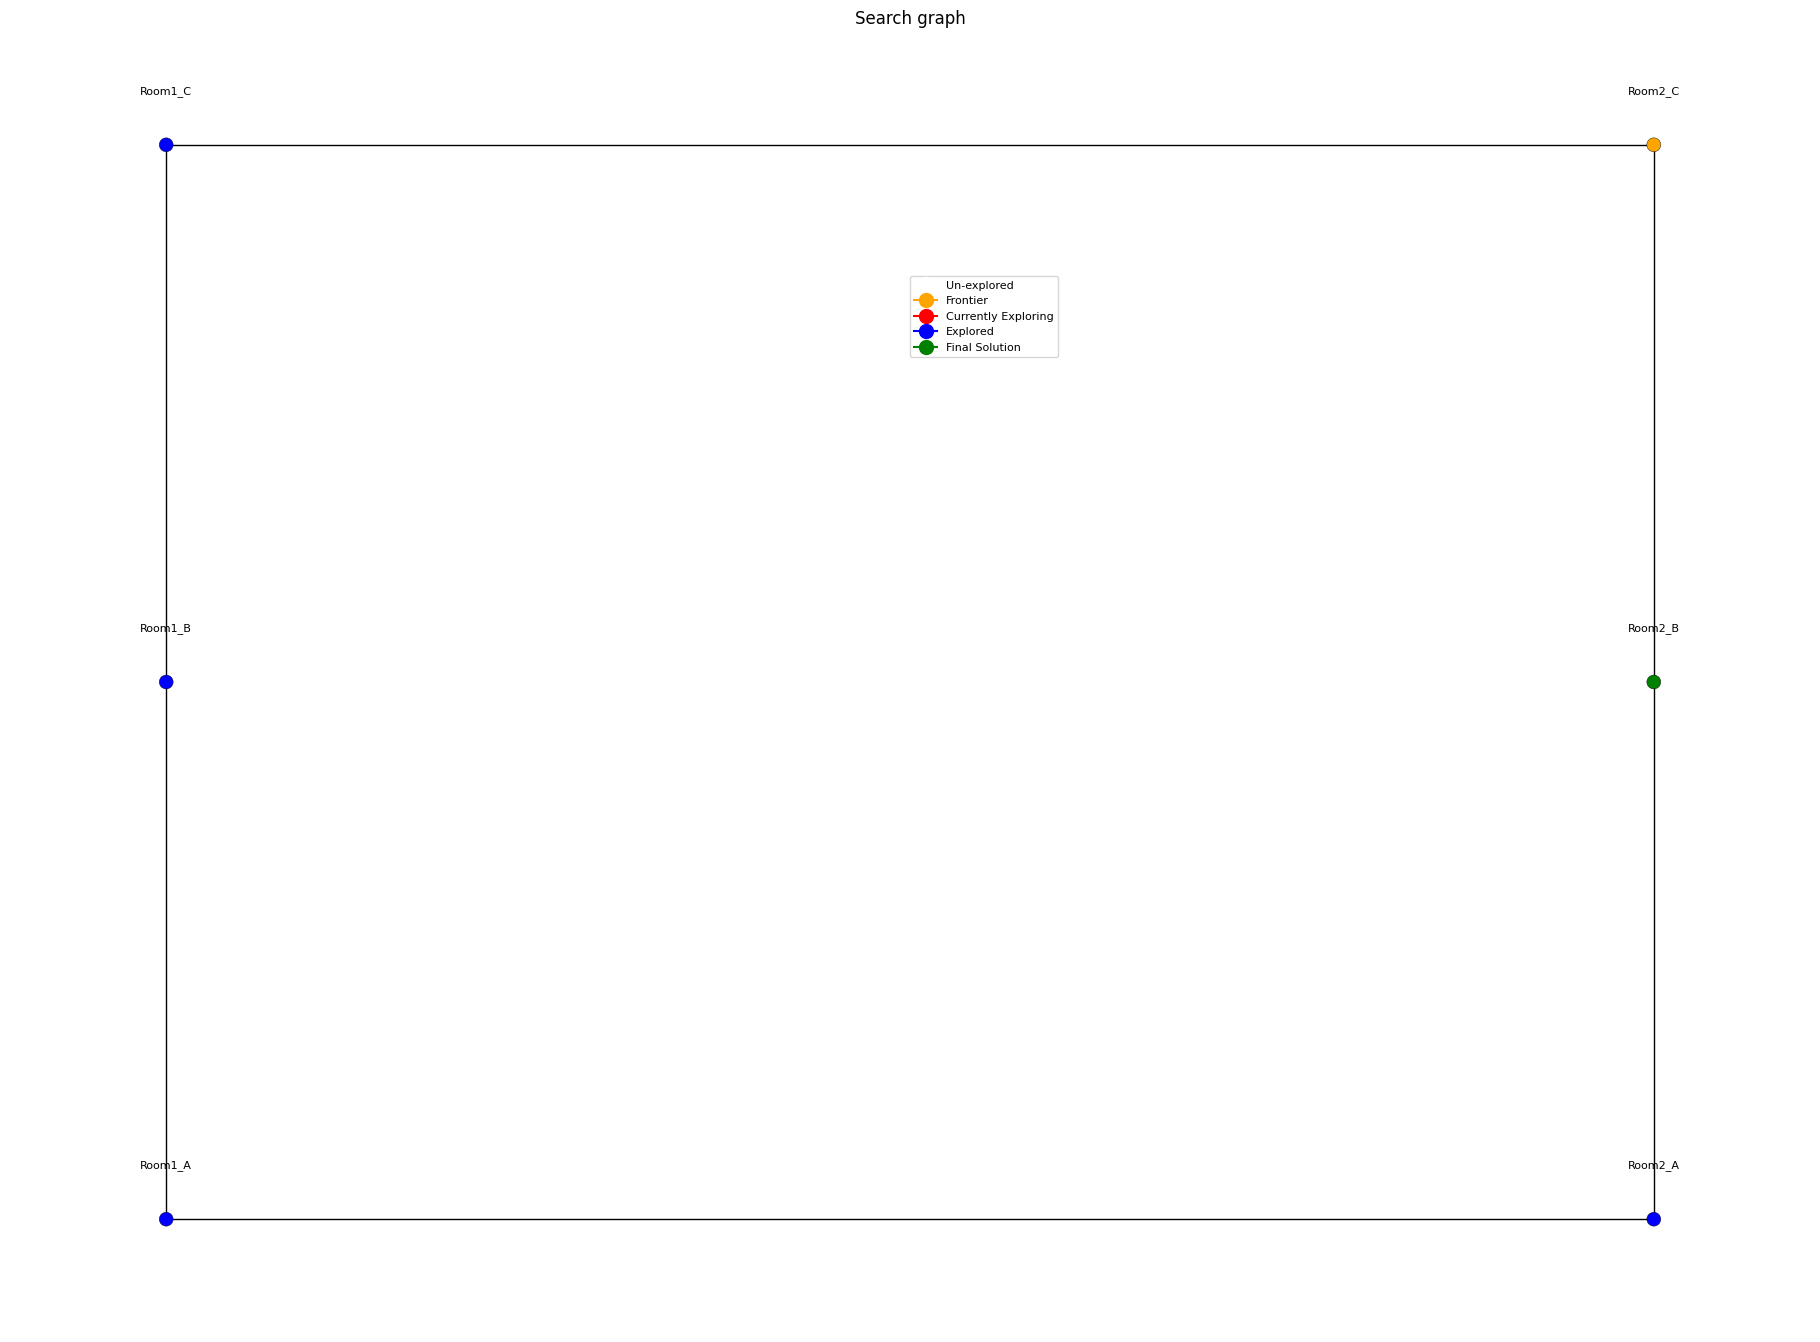

current percept: Room2_B
current goal: Room1_B
Frontier: <Node Room2_B>
Frontier: <Node Room2_A>
Frontier: <Node Room1_A>
Frontier: <Node Room1_B>
goal list: ['Room1_C', 'Room2_C', 'Room1_A']


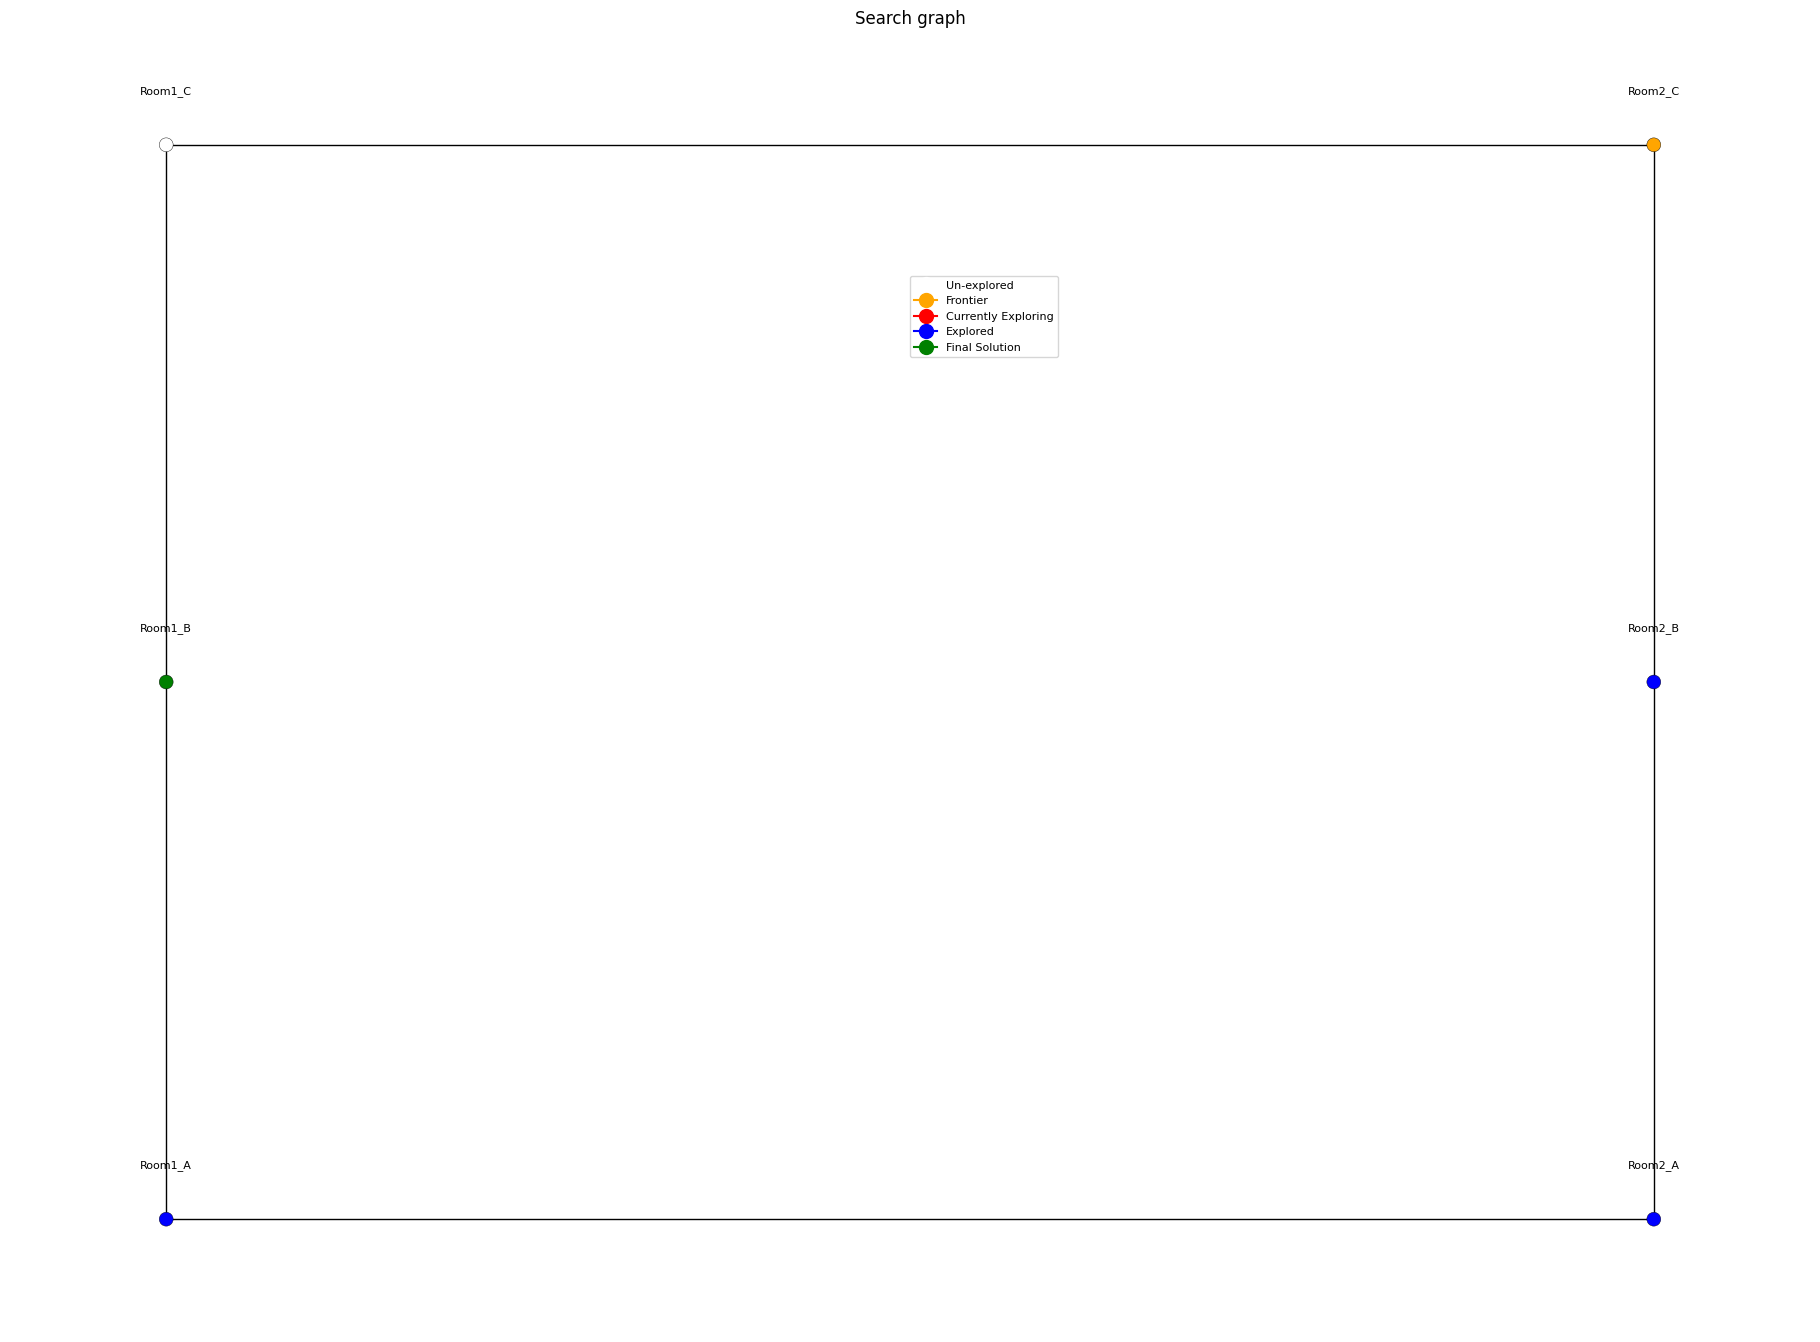

current percept: Room1_B
current goal: Room1_C
Frontier: <Node Room1_B>
Frontier: <Node Room1_A>
Frontier: <Node Room1_C>
goal list: ['Room2_C', 'Room1_A']


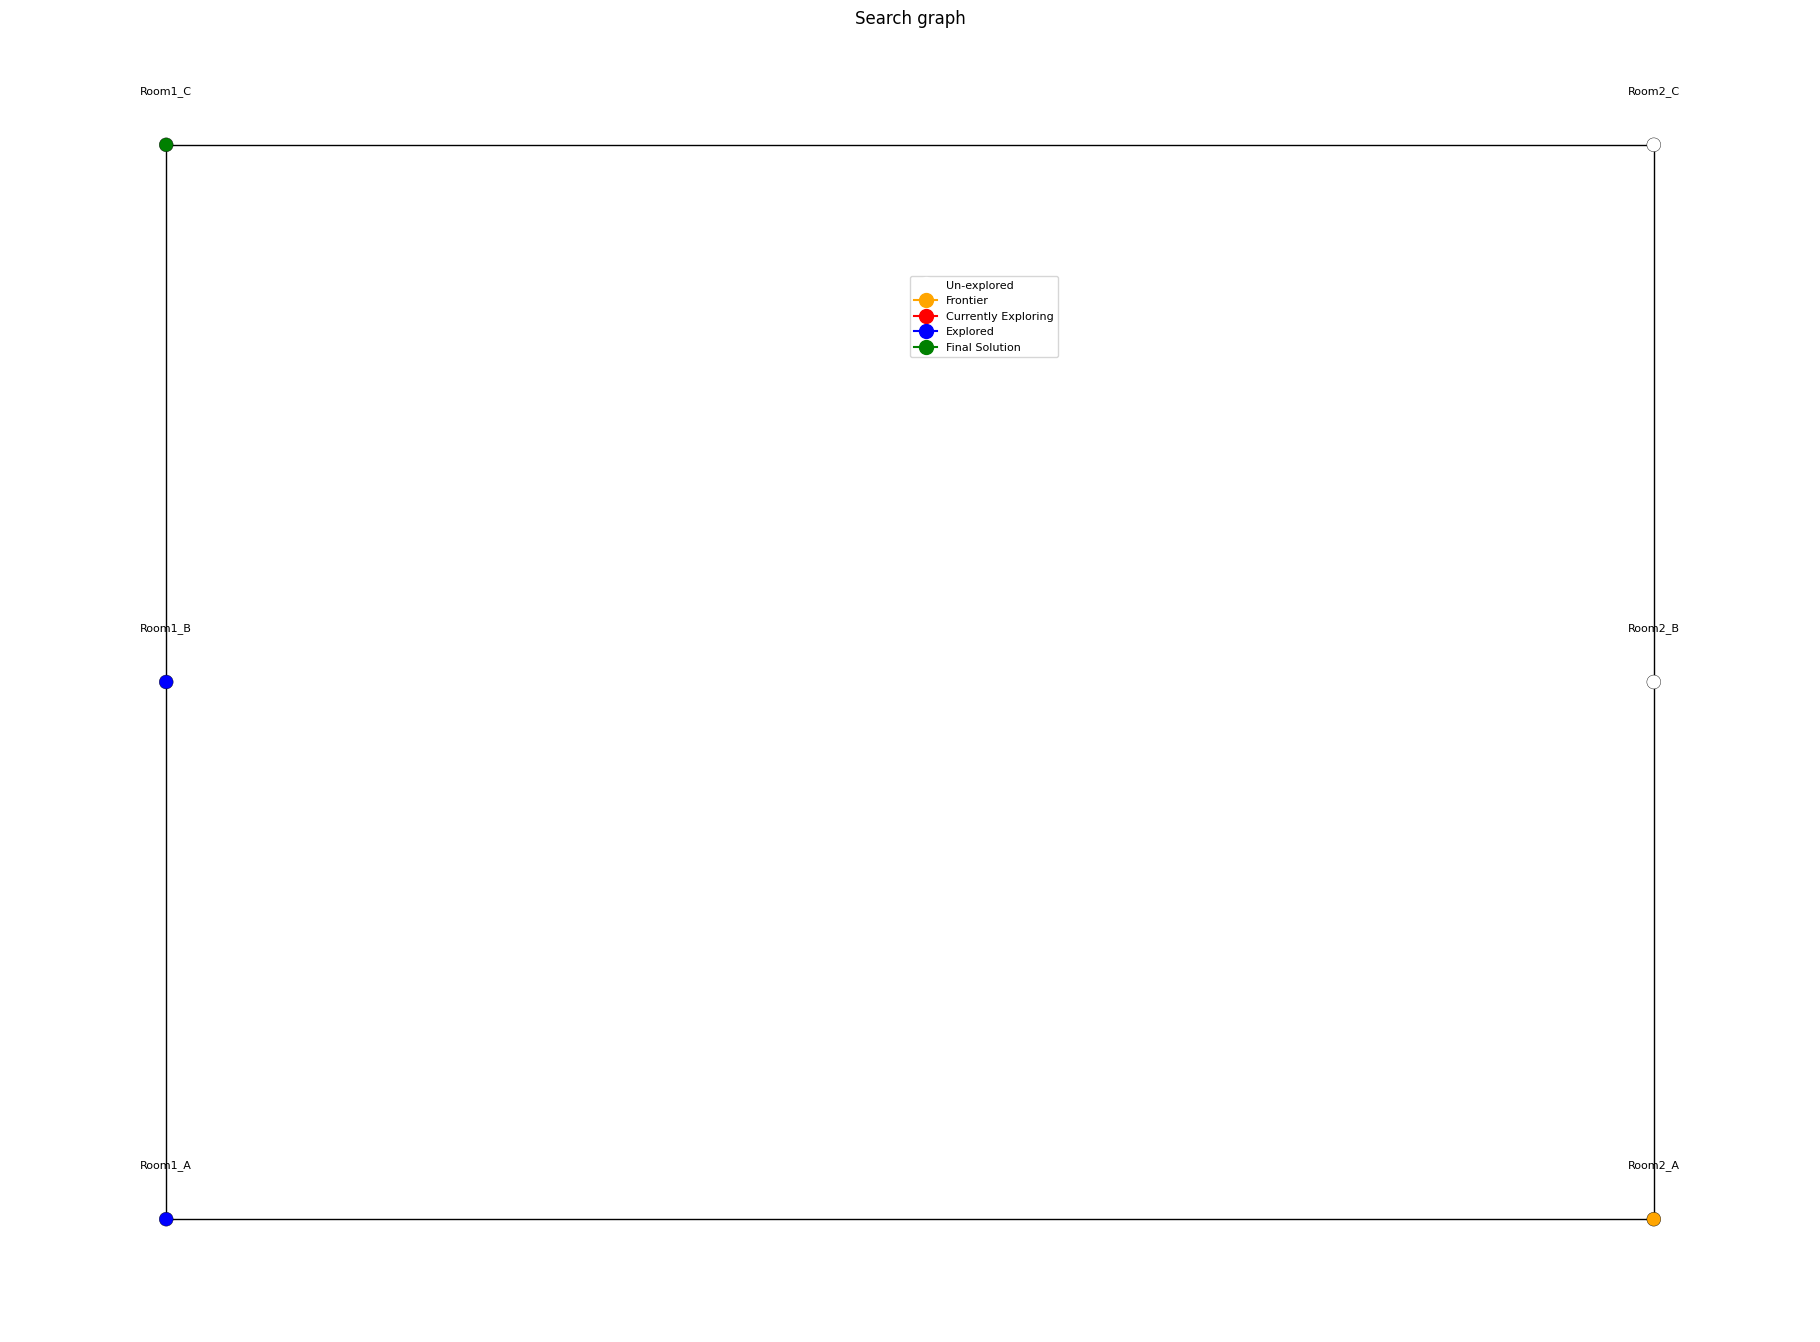

current percept: Room1_C
current goal: Room2_C
Frontier: <Node Room1_C>
Frontier: <Node Room1_B>
Frontier: <Node Room1_A>
Frontier: <Node Room2_A>
Frontier: <Node Room2_B>
Frontier: <Node Room2_C>
goal list: ['Room1_A']


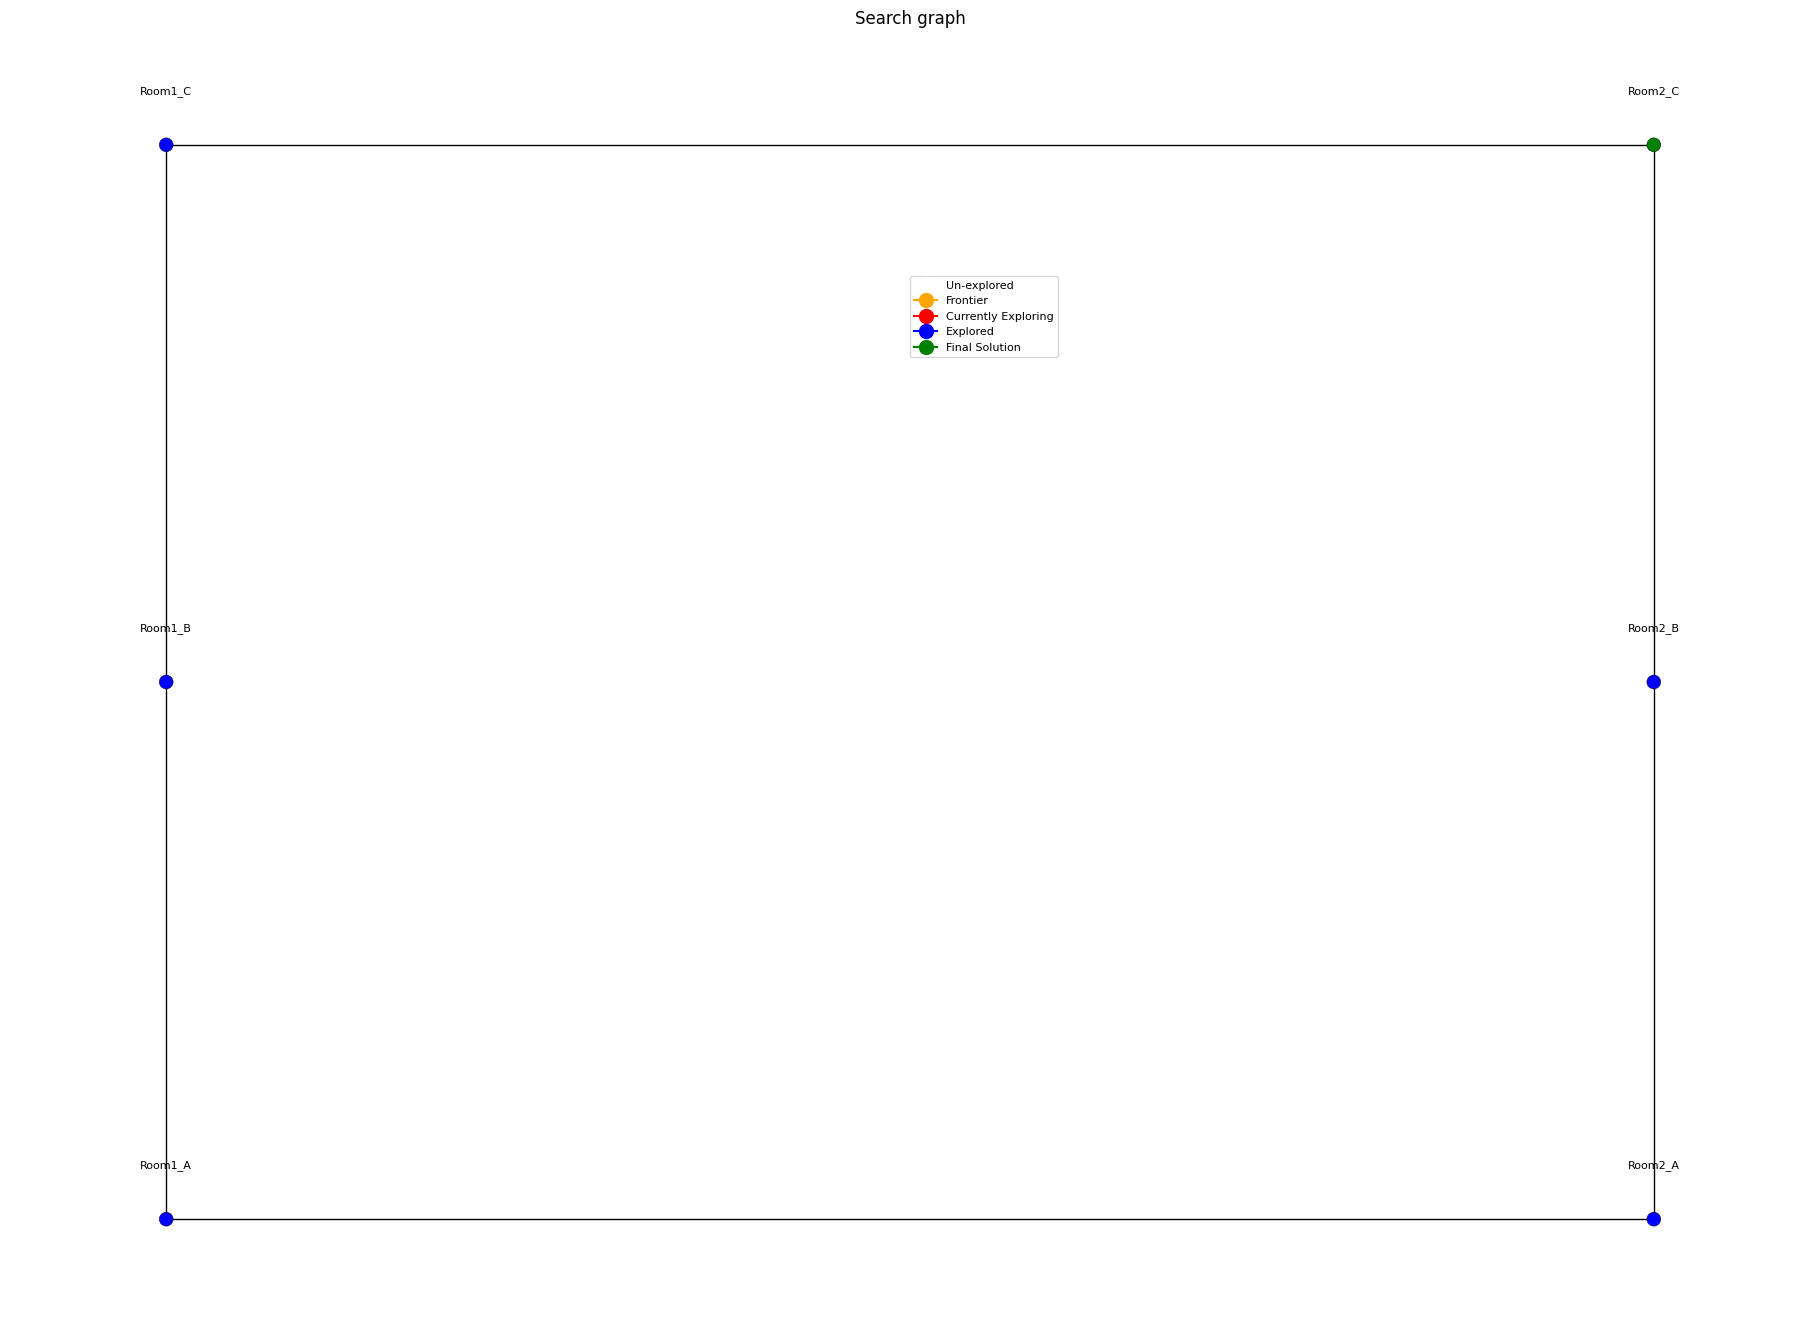

current percept: Room2_C
current goal: Room1_A
Frontier: <Node Room2_C>
Frontier: <Node Room1_C>
Frontier: <Node Room1_B>
Frontier: <Node Room1_A>
goal list: []


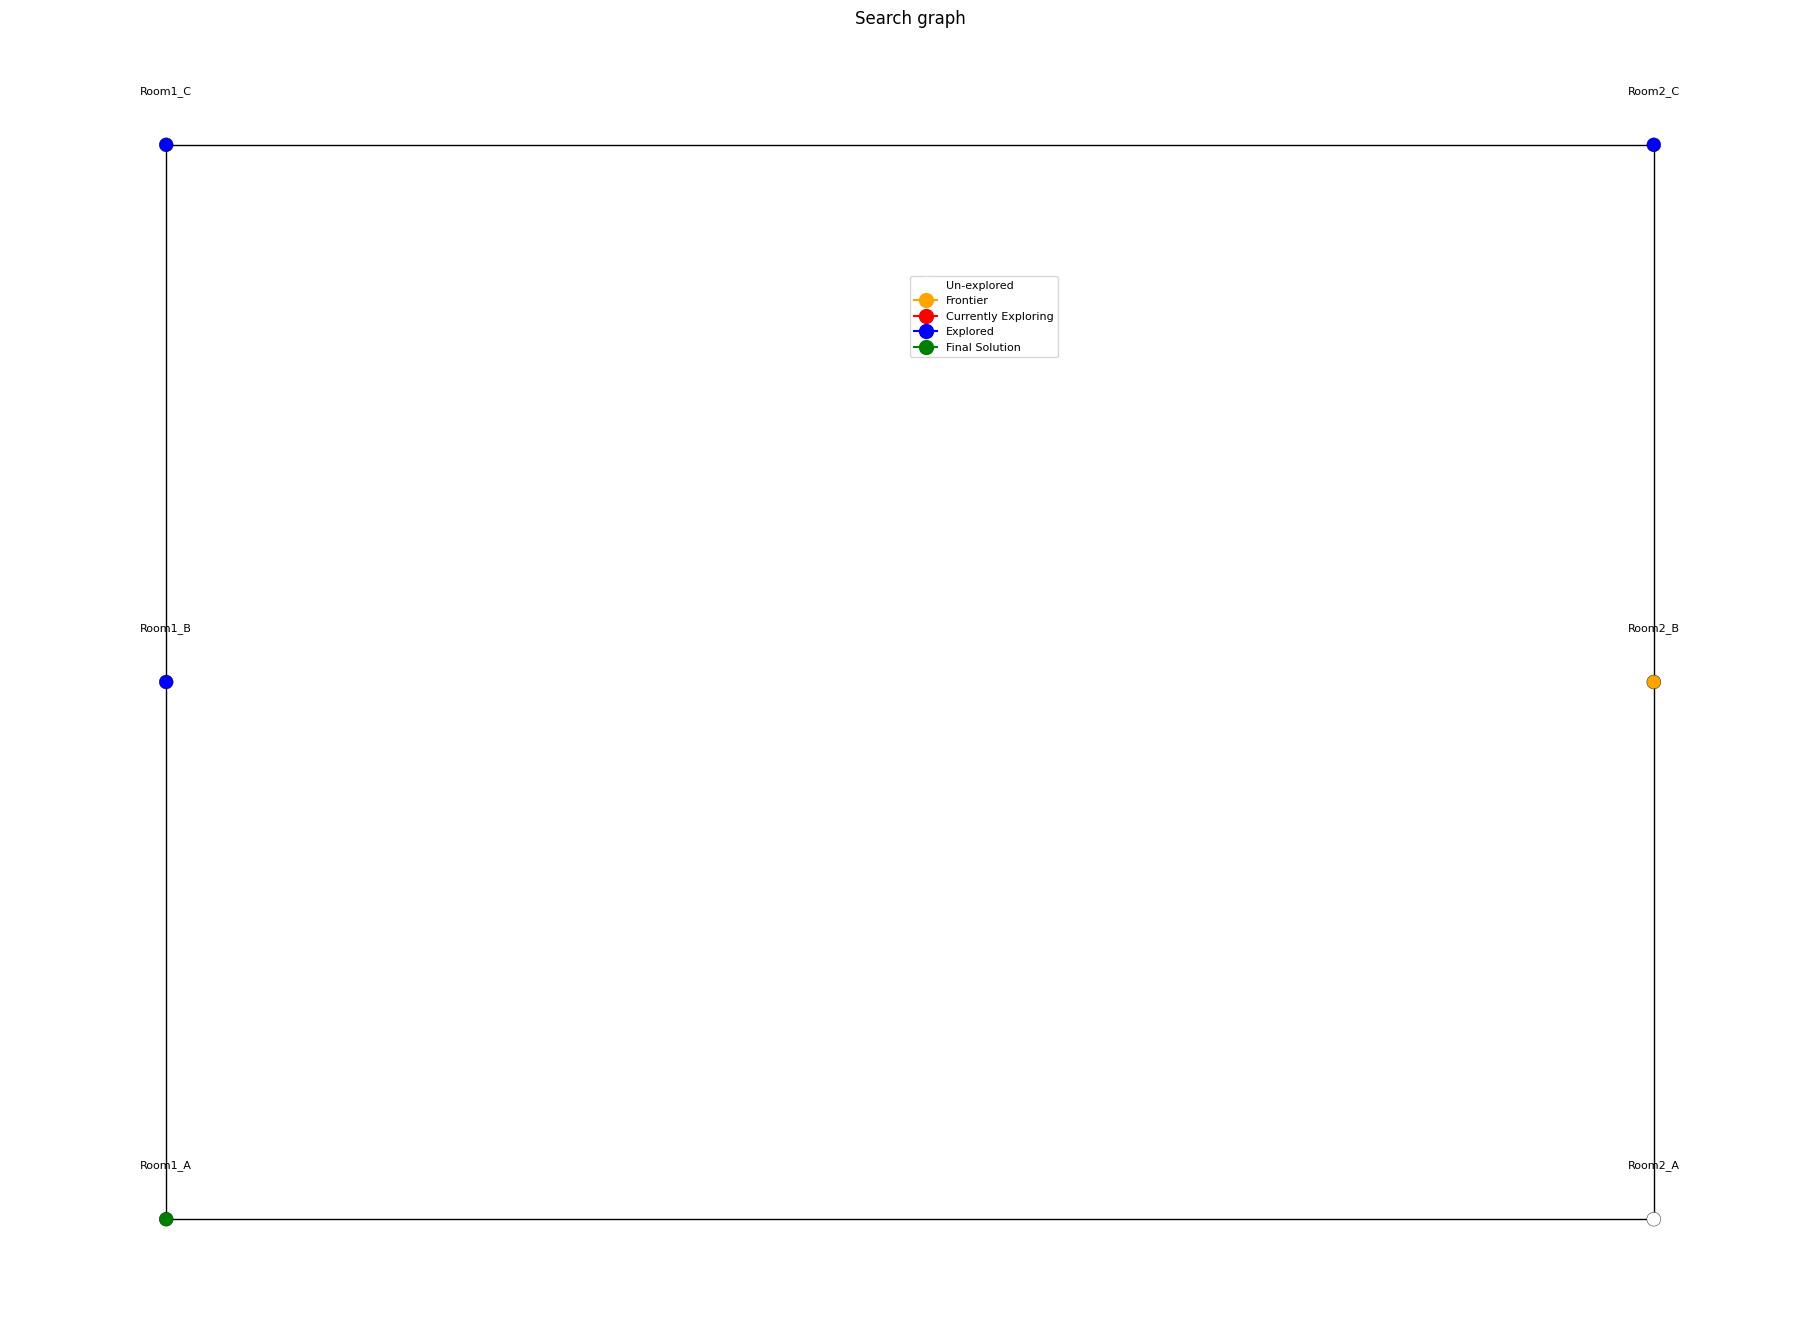

[['Room2_A', 'Room2_B'],
 ['Room2_A', 'Room1_A', 'Room1_B'],
 ['Room1_C'],
 ['Room2_C'],
 ['Room1_C', 'Room1_B', 'Room1_A']]

In [38]:

p3map = myMap(p3world, create_room_dict())
simple_visualization(p3map)



initial_states = ['Room1_A', 'Room2_A']

import random

initial = random.choice(initial_states)

goal_rooms = get_random_rooms()
goal_rooms.append(initial)

p3problem = GraphProblem(initial, goal_rooms,p3map)


bfs_show_program = BestFirstSearchAgentProgramForShow()



dps = deliveryProblemSolvingAgentPro(initial, p3map, goal_rooms, bfs_show_program)
dps.run()

